ODE calculation finished.


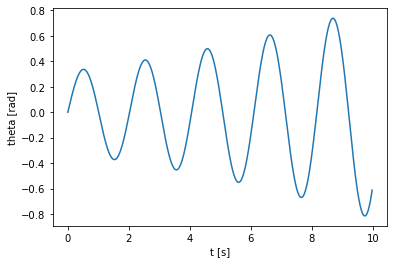

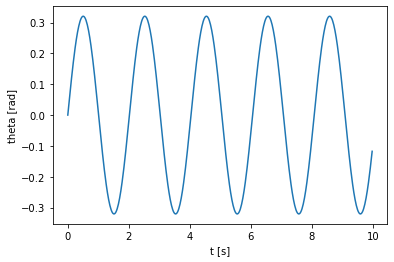

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from math import cos
import numpy as np
from scipy.integrate import odeint
from math import sin
import sys


''' constants '''
m = 1.   # mass of the pendulum [kg]
l = 1.   # length of the pendulum [m]
g = 9.8  # Gravitational acceleration [m/s^2]


def animfunc(s, t):
    ''' Create mp4 movie file of a pendulum '''
    plt.close()
    fig = plt.figure()
    plt.axis('scaled')
    plt.xlim(-1, 1)
    plt.ylim(-1.5, .5)
    plt.grid('on')
    draw_ceiling, = plt.plot([-2, 2], [0, 0], c='k', lw=2)
    draw_pendulum, = plt.plot([], [], lw=4, c='b')
    draw_mass, = plt.plot([], [], lw=2, marker='o', ms=20, mew=4, mec='b', mfc='c')
    indicate_time = plt.text(-0.3, 0.25, [], fontsize=12)

    def update_figure(i):
        ''' Set data of each movie frame '''
        mass_x = l * sin(s[i, 0])
        mass_y = - l * cos(s[i, 0])
        pendlum_x = [0, mass_x]
        pendlum_y = [0, mass_y]
        draw_pendulum.set_data(pendlum_x, pendlum_y)
        draw_mass.set_data(mass_x, mass_y)
        indicate_time.set_text('t = {0:4.2f} [s]'.format(t[i]))

    ''' Create a movie file '''
    line_ani = animation.FuncAnimation(fig, update_figure, frames=len(t))
    line_ani.save('./pendulum.mp4', fps=t_fps)
    print('pendulum.mp4 created')


def odefunc(s, t):
    theta = s[0]
    dtheta = s[1]
    ddtheta = -g / l * sin(theta)  # <- Equation of motion
    return np.r_[dtheta, ddtheta]


def ode_euler(func, s_init, t):
    ''' ODE solver using Euler method '''
    dt = t[1] - t[0]     # time iteration
    s_i = s_init.copy()  # initialize
    s = s_i.copy().reshape((1, 2))
    for t_i in t[:-1]:
        ds_i = func(s_i, t_i)
        s_i += dt * ds_i
        s = np.append(s, s_i.reshape((1, 2)), axis=0)
    return s


def ode_runge_kutta(func, s_init, t):
    ''' ODE solver using 4-th Runge-Kutta method '''
    dt = t[1] - t[0]     # time iteration
    s_i = s_init.copy()  # initialize
    s = s_i.copy().reshape((1, 2))
    for t_i in t[:-1]:
        k_1 = func(s_i, t_i)
        k_2 = func(s_i + 0.5 * dt * k_1, t_i + 0.5 * dt)
        k_3 = func(s_i + 0.5 * dt * k_2, t_i + 0.5 * dt)
        k_4 = func(s_i + dt * k_3, t_i + dt)
        s_i += dt / 6.0 * (k_1 + 2.0 * k_2 + 2.0 * k_3 + k_4)
        s = np.append(s, s_i.reshape((1, 2)), axis=0)
    return s


''' time setting '''
t_end = 10.          # simulation time [s]
t_fps = 50.          # frame per second. This value means smoothness of produced graph and animation
t_step = 1. / t_fps  # time iteration [s]
t = np.arange(0., t_end, t_step)

''' initial value '''
theta_init = 0.   # initial value of theta [rad]
dtheta_init = 1.  # initial value of dot theta [rad/s]
s_init = np.r_[theta_init, dtheta_init]

''' calculation '''
s_euler = ode_euler(odefunc, s_init, t)
s_runge = ode_runge_kutta(odefunc, s_init, t)
print('ODE calculation finished.')


''' visualization '''
# animfunc(s_euler, t)
# animfunc(s_runge, t)
plt.figure()
plt.plot(t, s_euler[:, 0])
plt.xlabel('t [s]')
plt.ylabel('theta [rad]')
plt.savefig('pendulum_graph_euler.png')
plt.figure()
plt.plot(t, s_runge[:, 0])
plt.xlabel('t [s]')
plt.ylabel('theta [rad]')
plt.savefig('pendulum_graph_runge.png')


ODE calculation finished.


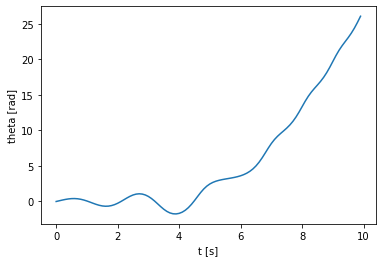

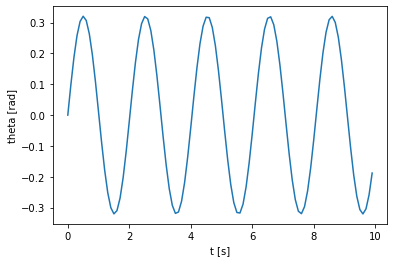

In [23]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from math import cos
import numpy as np
from scipy.integrate import odeint
from math import sin
import sys


''' constants '''
m = 1.   # mass of the pendulum [kg]
l = 1.   # length of the pendulum [m]
g = 9.8  # Gravitational acceleration [m/s^2]


def animfunc(s, t):
    ''' Create mp4 movie file of a pendulum '''
    plt.close()
    fig = plt.figure()
    plt.axis('scaled')
    plt.xlim(-1, 1)
    plt.ylim(-1.5, .5)
    plt.grid('on')
    draw_ceiling, = plt.plot([-2, 2], [0, 0], c='k', lw=2)
    draw_pendulum, = plt.plot([], [], lw=4, c='b')
    draw_mass, = plt.plot([], [], lw=2, marker='o', ms=20, mew=4, mec='b', mfc='c')
    indicate_time = plt.text(-0.3, 0.25, [], fontsize=12)

    def update_figure(i):
        ''' Set data of each movie frame '''
        mass_x = l * sin(s[i, 0])
        mass_y = - l * cos(s[i, 0])
        pendlum_x = [0, mass_x]
        pendlum_y = [0, mass_y]
        draw_pendulum.set_data(pendlum_x, pendlum_y)
        draw_mass.set_data(mass_x, mass_y)
        indicate_time.set_text('t = {0:4.2f} [s]'.format(t[i]))

    ''' Create a movie file '''
    line_ani = animation.FuncAnimation(fig, update_figure, frames=len(t))
    line_ani.save('./pendulum.mp4', fps=t_fps)
    print('pendulum.mp4 created')


def odefunc(s, t):
    theta = s[0]
    dtheta = s[1]
    ddtheta = -g / l * sin(theta)  # <- Equation of motion
    return np.r_[dtheta, ddtheta]


def ode_euler(func, s_init, t):
    ''' ODE solver using Euler method '''
    dt = t[1] - t[0]     # time iteration
    s_i = s_init.copy()  # initialize
    s = s_i.copy().reshape((1, 2))
    for t_i in t[:-1]:
        ds_i = func(s_i, t_i)
        s_i += dt * ds_i
        s = np.append(s, s_i.reshape((1, 2)), axis=0)
    return s


def ode_runge_kutta(func, s_init, t):
    ''' ODE solver using 4-th Runge-Kutta method '''
    dt = t[1] - t[0]     # time iteration
    s_i = s_init.copy()  # initialize
    s = s_i.copy().reshape((1, 2))
    for t_i in t[:-1]:
        k_1 = func(s_i, t_i)
        k_2 = func(s_i + 0.5 * dt * k_1, t_i + 0.5 * dt)
        k_3 = func(s_i + 0.5 * dt * k_2, t_i + 0.5 * dt)
        k_4 = func(s_i + dt * k_3, t_i + dt)
        s_i += dt / 6.0 * (k_1 + 2.0 * k_2 + 2.0 * k_3 + k_4)
        s = np.append(s, s_i.reshape((1, 2)), axis=0)
    return s


''' time setting '''
t_end = 10.          # simulation time [s]
t_fps = 10         # frame per second. This value means smoothness of produced graph and animation
t_step = 1. / t_fps  # time iteration [s]
t = np.arange(0., t_end, t_step)

''' initial value '''
theta_init = 0.   # initial value of theta [rad]
dtheta_init = 1.  # initial value of dot theta [rad/s]
s_init = np.r_[theta_init, dtheta_init]

''' calculation '''
s_euler = ode_euler(odefunc, s_init, t)
s_runge = ode_runge_kutta(odefunc, s_init, t)
print('ODE calculation finished.')


''' visualization '''
# animfunc(s_euler, t)
# animfunc(s_runge, t)
plt.figure()
plt.plot(t, s_euler[:, 0])
plt.xlabel('t [s]')
plt.ylabel('theta [rad]')
plt.savefig('pendulum_graph_euler.png')
plt.figure()
plt.plot(t, s_runge[:, 0])
plt.xlabel('t [s]')
plt.ylabel('theta [rad]')
plt.savefig('pendulum_graph_runge.png')


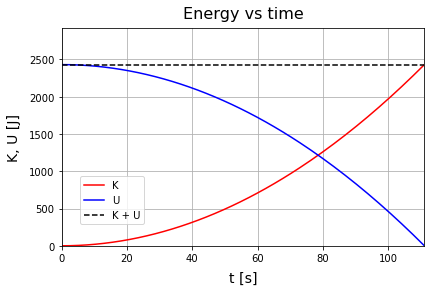

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 月面付近の重力加速度
g = 9.8

# ボールの質量
m = 1.

# 高度の初期設定
l = 1.

# ボールが地面に到達する時間

# 落下時間

# 落下速度
v = - g * t

# 高度
y = h - (g * t**2) / 2

# 運動エネルギー
K = (m * v**2) / 2

# 位置エネルギー
U = m * g * y

# FigureとAxesの設定
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.set_title("Energy vs time", fontsize=16, pad=10)
ax.grid()
ax.set_xlim(0, max(t))
ax.set_ylim(0, max(U)*1.2)
ax.set_xlabel("t [s]", fontsize=14, labelpad=8)
ax.set_ylabel("K, U [J]", fontsize=14, labelpad=8)

# K,U,K+Uの時間変化をプロット
ax.plot(t, K, color="red", label="K")
ax.plot(t, U, color="blue", label="U")
ax.plot(t, K + U, color="black", linestyle="--", label="K + U")

# 凡例を表示
ax.legend(loc=(0.05, 0.1))

plt.show()
